In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance, anova_lm

# Problem 1A
# Salary Analysis 

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]



In [3]:
df=pd.read_csv('SalaryData.csv')
df.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [4]:
df.describe(include='all')

Education       Occupation         Salary
count           40               40      40.000000
unique           3                4            NaN
top      Doctorate   Prof-specialty            NaN
freq            16               13            NaN
mean           NaN              NaN  162186.875000
std            NaN              NaN   64860.407506
min            NaN              NaN   50103.000000
25%            NaN              NaN   99897.500000
50%            NaN              NaN  169100.000000
75%            NaN              NaN  214440.750000
max            NaN              NaN  260151.000000

In [5]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [6]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


Both 'Education' and 'Occupation' columns are categorical

# 1A.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.


## Education:
$H_0$= The mean salary of students across three different educational qualification levels is same\
$H_1$= The mean salary of students is different in atleast one of the three education qualification levels

## Occupation:
$H_0$= The mean salary of students across four different Occupation levels is same\
$H_1$= The mean salary of students is different in atleast one of the four occupation levels

# 1A.2 Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.


One-way ANOVA on Salary with respect to Education

In [8]:
formula='Salary ~ C(Education)'
model=ols(formula,df).fit()
aov_table=anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


Conclusion:\
Since the p value is less than the significance level (0.05), we can reject the null hypothesis and conclude that there is a difference in the mean salaries of students in atleast one education qualification level.

# 1A.3 Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.


In [9]:
formula='Salary ~ C(Occupation)'
model=ols(formula,df).fit()
aov_table=anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


Conclusion:\
Since the p value is greater than the significance level (0.05), we fail to reject the null hypothesis. So at 95% confidence level, there is sufficient evidence to prove that the mean salary of students across four different Occupation levels is same

# 1A.4 If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

Null hypothesis is rejected for Education qualification feature.

In [67]:
df1=pd.DataFrame(df.groupby(by='Education')['Salary'].mean())
df1.reset_index()

Education         Salary
0   Bachelors  165152.933333
1   Doctorate  208427.000000
2     HS-grad   75038.777778

It can be observed that HS-grad students have siginificantly different mean salary.

# Problem 1B

# 1B.1 What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]


Let's do two-way ANOVA to check the interaction b/w two treatments

In [11]:
formula='Salary ~ C(Education) + C(Occupation)'
model=ols(formula,df).fit()
aov_table=anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN


Insights: \
Education: \
F-stat value for 'Education' feature is ~31, which says that variability b/w education levels is 31 times than variability within the education levels. \
p-value is less than 0.05, so we can reject the null hypothesis that mean salaries due to different education levels is same. \
Occupation: \
F-stat value for 'Occupation' feature is ~1, which says that variability b/w occupation levels is less comapred variability within the occupation levels. \
p-value is greater than 0.05, so we fail to reject the null hypothesis. \
Finally we can say, 'Education' is significant cause for the effect on the salaries, not 'Occupation'

<AxesSubplot:xlabel='Education', ylabel='Salary'>

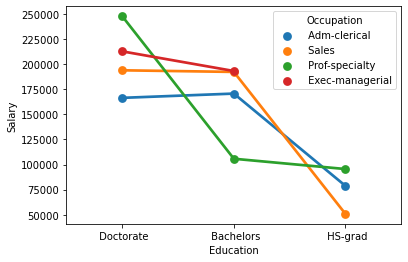

In [12]:
sns.pointplot(x='Education', y='Salary', data=df, hue='Occupation', ci=None)

Insights: \
1) We can see significant drop in salaries from 'Bachelors' level to 'HS-grad' for 'Sales' & 'Adm-clerical' occupation levels. \
2) We can see one more significant drop from 'Doctorate' level to 'Bachelors' for 'Prof-specialty' occupation level.\
3) There is no significant changes in salaries observed from 'Doctorate' level to 'Bachelors' for 'Adm-Clerical', 'Sales' & 'Exec-managerial'



# 1B.2 Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?


Two-way anova to check interaction b/w two features given. \
$H_0$= There is interaction b/w 'Education' and 'Occupation' features \
$H_1$=There is no interaction b/w 'Education' and 'Occupation' features


In [13]:
formula='Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model=ols(formula,df).fit()
aov_table=anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


Interpretation: \
1) p-value is less than 0.05 for the interaction. We reject the null hypothesis i.e., at 95% confidence level, there is no interaction b/w 'Education' and 'Occupation' features \
2) F-stat value also increased after considering the interaction. That means, variability b/w education levels is ~72 times than variability within the education levels when we consider the interaction b/w two features 


# 1B.3 Explain the business implications of performing ANOVA for this particular case study.


1) Salary dependency is more on 'Education' background level compared to 'Occupation' level. Variability is high b/w 'Education' levels, on which company should concentrate more on. \
2) Mean salary for 'Prof specialty' is highly different for 'Doctorate' & 'Bachelor' levels. Company should concentrate on reducing the variability in this case.
3) We observed that there is not much interaction b/w 'Education' & 'Occupation' on salary. But there should be some interaction b/w them in deciding the salary of the student. Company should work on correlating the 'Education' to 'Occupation' some more. 

# Problem 2

The dataset Education contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given.


# 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?


## Data description

In [69]:
df_12th=pd.read_csv('Education+-+Post+12th+Standard.csv')
df_12th.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [22]:
print('The total no. of application received', df_12th['Apps'].sum())

The total no. of application received 2332273


In [70]:
print('The total no. of student enrolled', df_12th['Enroll'].sum())

The total no. of student enrolled 606039


In [15]:
print('Percentage of new students from top 10% of the higher secondary class is', round((df_12th['Top10perc'].sum()/df_12th.Enroll.sum())*100,2))

Percentage of new students from top 10% of the higher secondary class is 3.53


In [16]:
print('Percentage of new students from top 25% of the higher secondary class is', round((df_12th['Top25perc'].sum()/df_12th.Enroll.sum())*100,2))

Percentage of new students from top 25% of the higher secondary class is 7.15


In [17]:
df_12th.shape

(777, 18)

In [18]:
df_12th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [19]:
df_12th.describe(include='all').T

count unique                           top freq          mean  \
Names          777    777  Abilene Christian University    1           NaN   
Apps         777.0    NaN                           NaN  NaN   3001.638353   
Accept       777.0    NaN                           NaN  NaN   2018.804376   
Enroll       777.0    NaN                           NaN  NaN    779.972973   
Top10perc    777.0    NaN                           NaN  NaN     27.558559   
Top25perc    777.0    NaN                           NaN  NaN     55.796654   
F.Undergrad  777.0    NaN                           NaN  NaN   3699.907336   
P.Undergrad  777.0    NaN                           NaN  NaN    855.298584   
Outstate     777.0    NaN                           NaN  NaN  10440.669241   
Room.Board   777.0    NaN                           NaN  NaN   4357.526384   
Books        777.0    NaN                           NaN  NaN    549.380952   
Personal     777.0    NaN                           NaN  NaN   1340.642214   
PhD          777.0    NaN                           NaN  NaN     72.660232   
Terminal     777.0    NaN                           NaN  NaN     79.702703   
S.F.Ratio    777.0    NaN                           NaN  NaN     14.089704   
perc.alumni  777.0    NaN                           NaN  NaN     22.743887   
Expend       777.0    NaN                           NaN  NaN   9660.171171   
Grad.Rate    777.0    NaN                           NaN  NaN      65.46332   

                     std     min     25%     50%      75%      max  
Names                NaN     NaN     NaN     NaN      NaN      NaN  
Apps         3870.201484    81.0   776.0  1558.0   3624.0  48094.0  
Accept       2451.113971    72.0   604.0  1110.0   2424.0  26330.0  
Enroll         929.17619    35.0   242.0   434.0    902.0   6392.0  
Top10perc      17.640364     1.0    15.0    23.0     35.0     96.0  
Top25perc      19.804778     9.0    41.0    54.0     69.0    100.0  
F.Undergrad  4850.420531   139.0   992.0  1707.0   4005.0  31643.0  
P.Undergrad  1522.431887     1.0    95.0   353.0    967.0  21836.0  
Outstate     4023.016484  2340.0  7320.0  9990.0  12925.0  21700.0  
Room.Board   1096.696416  1780.0  3597.0  4200.0   5050.0   8124.0  
Books          165.10536    96.0   470.0   500.0    600.0   2340.0  
Personal      677.071454   250.0   850.0  1200.0   1700.0   6800.0  
PhD            16.328155     8.0    62.0    75.0     85.0    103.0  
Terminal       14.722359    24.0    71.0    82.0     92.0    100.0  
S.F.Ratio       3.958349     2.5    11.5    13.6     16.5     39.8  
perc.alumni    12.391801     0.0    13.0    21.0     31.0     64.0  
Expend        5221.76844  3186.0  6751.0  8377.0  10830.0  56233.0  
Grad.Rate       17.17771    10.0    53.0    65.0     78.0    118.0

In [21]:
df_12th.duplicated().sum()

0

## Insights:
1) There are 777 observations without any missing values and duplicated records\
2) 'Names' column is categorical and remaining other columns are numerical\
3) Total 606039 students enrolled out of 2332273 applications various colleges received\
4) 3.53% of the new students are from from top 10% of higher secondary class  \
5) 7.15% of the new students are from from top 25% of higher secondary class \
6) Percentage of Phd faculties and Grad.Rate shows 103% and 118% as maximum values respectively, it is an anamoly because it should be either 100% or below 100% \
7) On an average, terminal degree faculties are more than PhD faculties \
8) As per S.F.Ratio, on an average there is one faculty for every ~14 students \
9) On an average, full-time graduate students are more than part-time graduate students \
10) Spendings on Room&Board is more than Book and Personal \
11) Variability is more for instructional expenditure per student across all the colleges 

## Data pre-processing

There are no missing values in the data 

There are no duplicated records

Anamoly treatment: \
Anamolies are observed in Percentage of Phd faculties and Grad.Rate features. \
Percentages have been observed more than 100% 


Let's treat them

In [24]:
Impute_value=100

In [25]:
df_12th[df_12th['PhD']>100]

Names  Apps  Accept  Enroll  Top10perc  \
582  Texas A&M University at Galveston   529     481     243         22   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
582         47         1206          134      4860        3122    600   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
582       650  103        88       17.4           16    6415         43

In [26]:
df_12th['PhD'] = df_12th['PhD'].replace(to_replace=103,value=Impute_value)
df_12th.iloc[582]

Names          Texas A&M University at Galveston
Apps                                         529
Accept                                       481
Enroll                                       243
Top10perc                                     22
Top25perc                                     47
F.Undergrad                                 1206
P.Undergrad                                  134
Outstate                                    4860
Room.Board                                  3122
Books                                        600
Personal                                     650
PhD                                          100
Terminal                                      88
S.F.Ratio                                   17.4
perc.alumni                                   16
Expend                                      6415
Grad.Rate                                     43
Name: 582, dtype: object

In [27]:
df_12th[df_12th['Grad.Rate']>100]

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
95  Cazenovia College  3847    3433     527          9         35   

    F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
95         1010           12      9384        4840    600       500   22   

    Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
95        47       14.3           20    7697        118

In [28]:
df_12th['Grad.Rate'] = df_12th['Grad.Rate'].replace(to_replace=118,value=Impute_value)
df_12th.iloc[95]

Names          Cazenovia College
Apps                        3847
Accept                      3433
Enroll                       527
Top10perc                      9
Top25perc                     35
F.Undergrad                 1010
P.Undergrad                   12
Outstate                    9384
Room.Board                  4840
Books                        600
Personal                     500
PhD                           22
Terminal                      47
S.F.Ratio                   14.3
perc.alumni                   20
Expend                      7697
Grad.Rate                    100
Name: 95, dtype: object

Anomolies are treated successfully in PhD and Grad.Rate features

## Data visualization

Univariate analysis:

array([[<AxesSubplot:title={'center':'Apps'}>,
        <AxesSubplot:title={'center':'Accept'}>,
        <AxesSubplot:title={'center':'Enroll'}>],
       [<AxesSubplot:title={'center':'Top10perc'}>,
        <AxesSubplot:title={'center':'Top25perc'}>,
        <AxesSubplot:title={'center':'F.Undergrad'}>],
       [<AxesSubplot:title={'center':'P.Undergrad'}>,
        <AxesSubplot:title={'center':'Outstate'}>,
        <AxesSubplot:title={'center':'Room.Board'}>],
       [<AxesSubplot:title={'center':'Books'}>,
        <AxesSubplot:title={'center':'Personal'}>,
        <AxesSubplot:title={'center':'PhD'}>],
       [<AxesSubplot:title={'center':'Terminal'}>,
        <AxesSubplot:title={'center':'S.F.Ratio'}>,
        <AxesSubplot:title={'center':'perc.alumni'}>],
       [<AxesSubplot:title={'center':'Expend'}>,
        <AxesSubplot:title={'center':'Grad.Rate'}>, <AxesSubplot:>]],
      dtype=object)

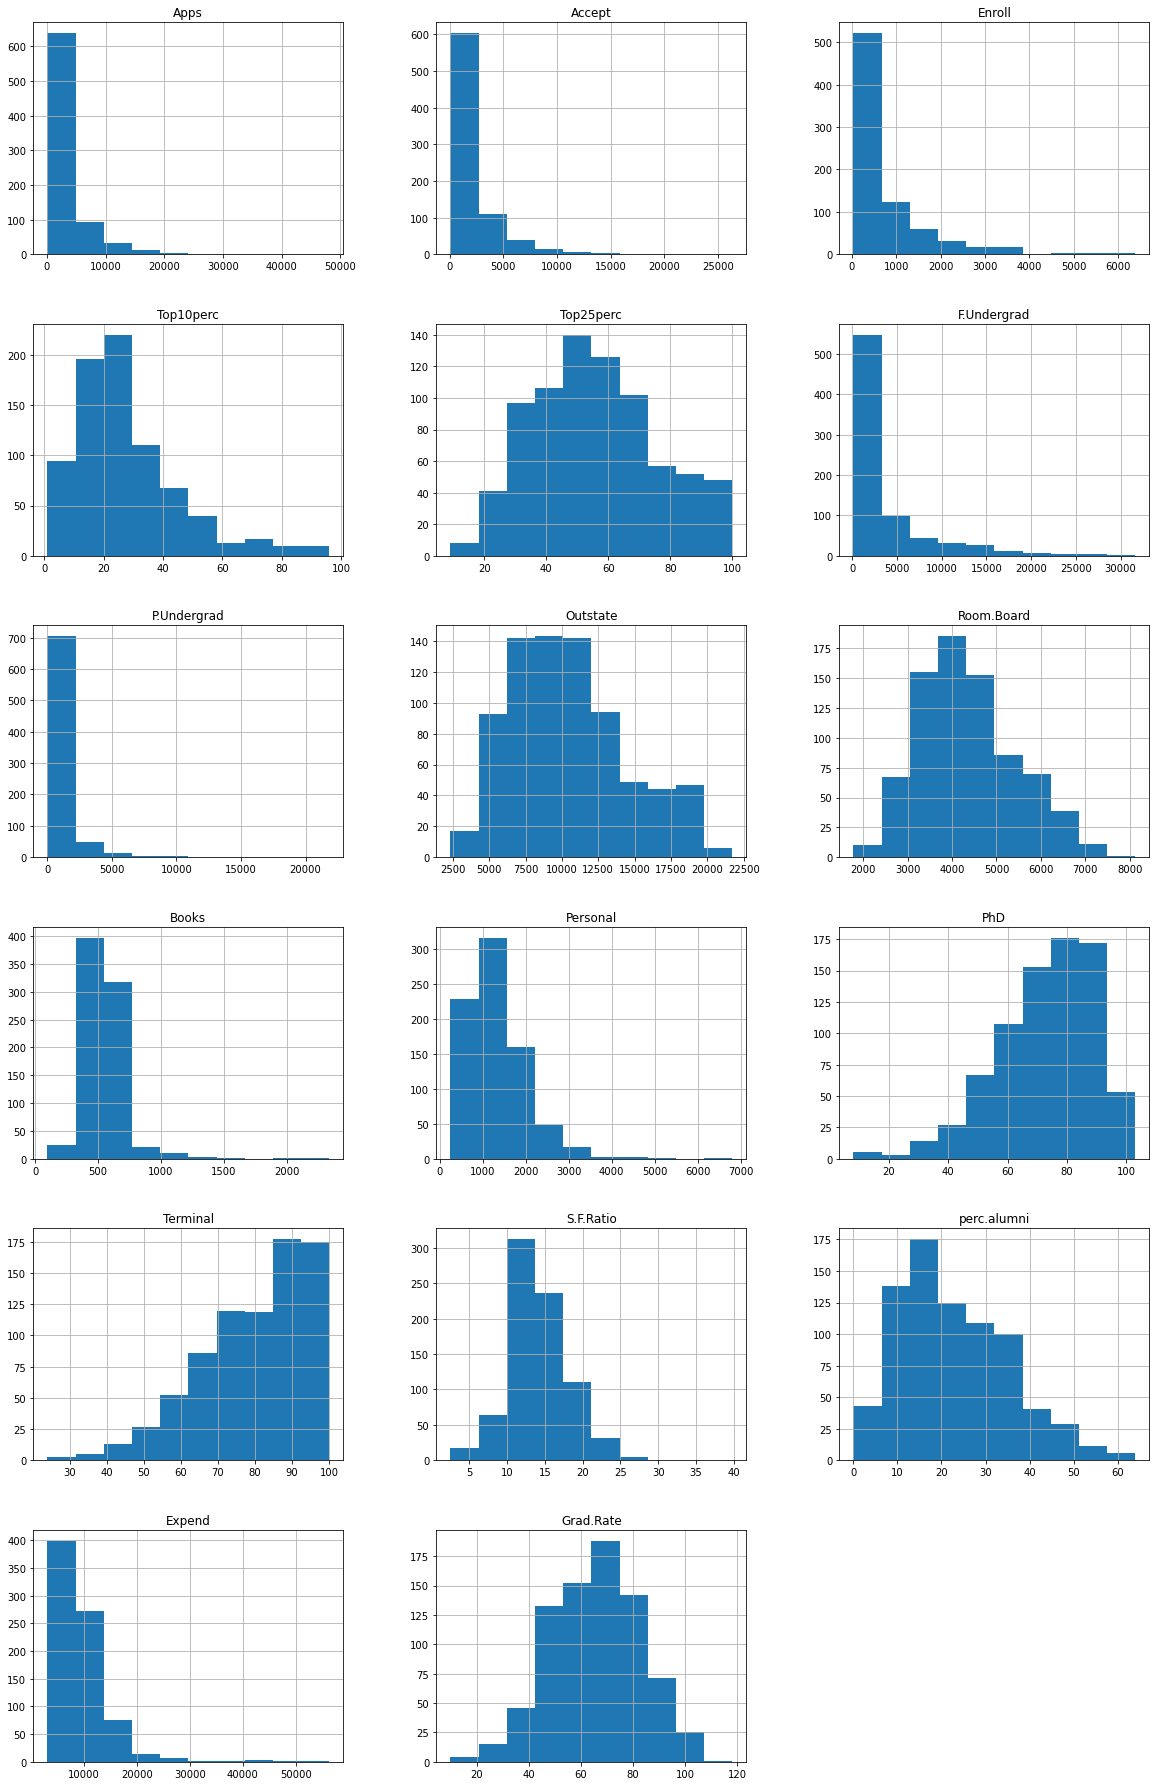

In [74]:
df_12th.hist(bins=10, figsize=(20,32), layout=(6,3))

In [32]:
round(df_12th.skew(),2)

C:\Users\sireesha\AppData\Local\Temp/ipykernel_7904/2756269012.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  round(df_12th.skew(),2)


Apps           3.72
Accept         3.42
Enroll         2.69
Top10perc      1.41
Top25perc      0.26
F.Undergrad    2.61
P.Undergrad    5.69
Outstate       0.51
Room.Board     0.48
Books          3.49
Personal       1.74
PhD           -0.77
Terminal      -0.82
S.F.Ratio      0.67
perc.alumni    0.61
Expend         3.46
Grad.Rate     -0.14
dtype: float64

Top25perc, Outstate, Room.Board, Grad.Rate are normally distributed features

Apps, Accept, Enroll, Top10perc, F.Undergrad, P.Undergrad, Books, Personal, Expend are highly right skewed distribution 

S.F.Ratio, perc.alumni are moderately right skewed distribution 

PhD, Terminal are moderately left skewed distribution 


Bivariate analysis:

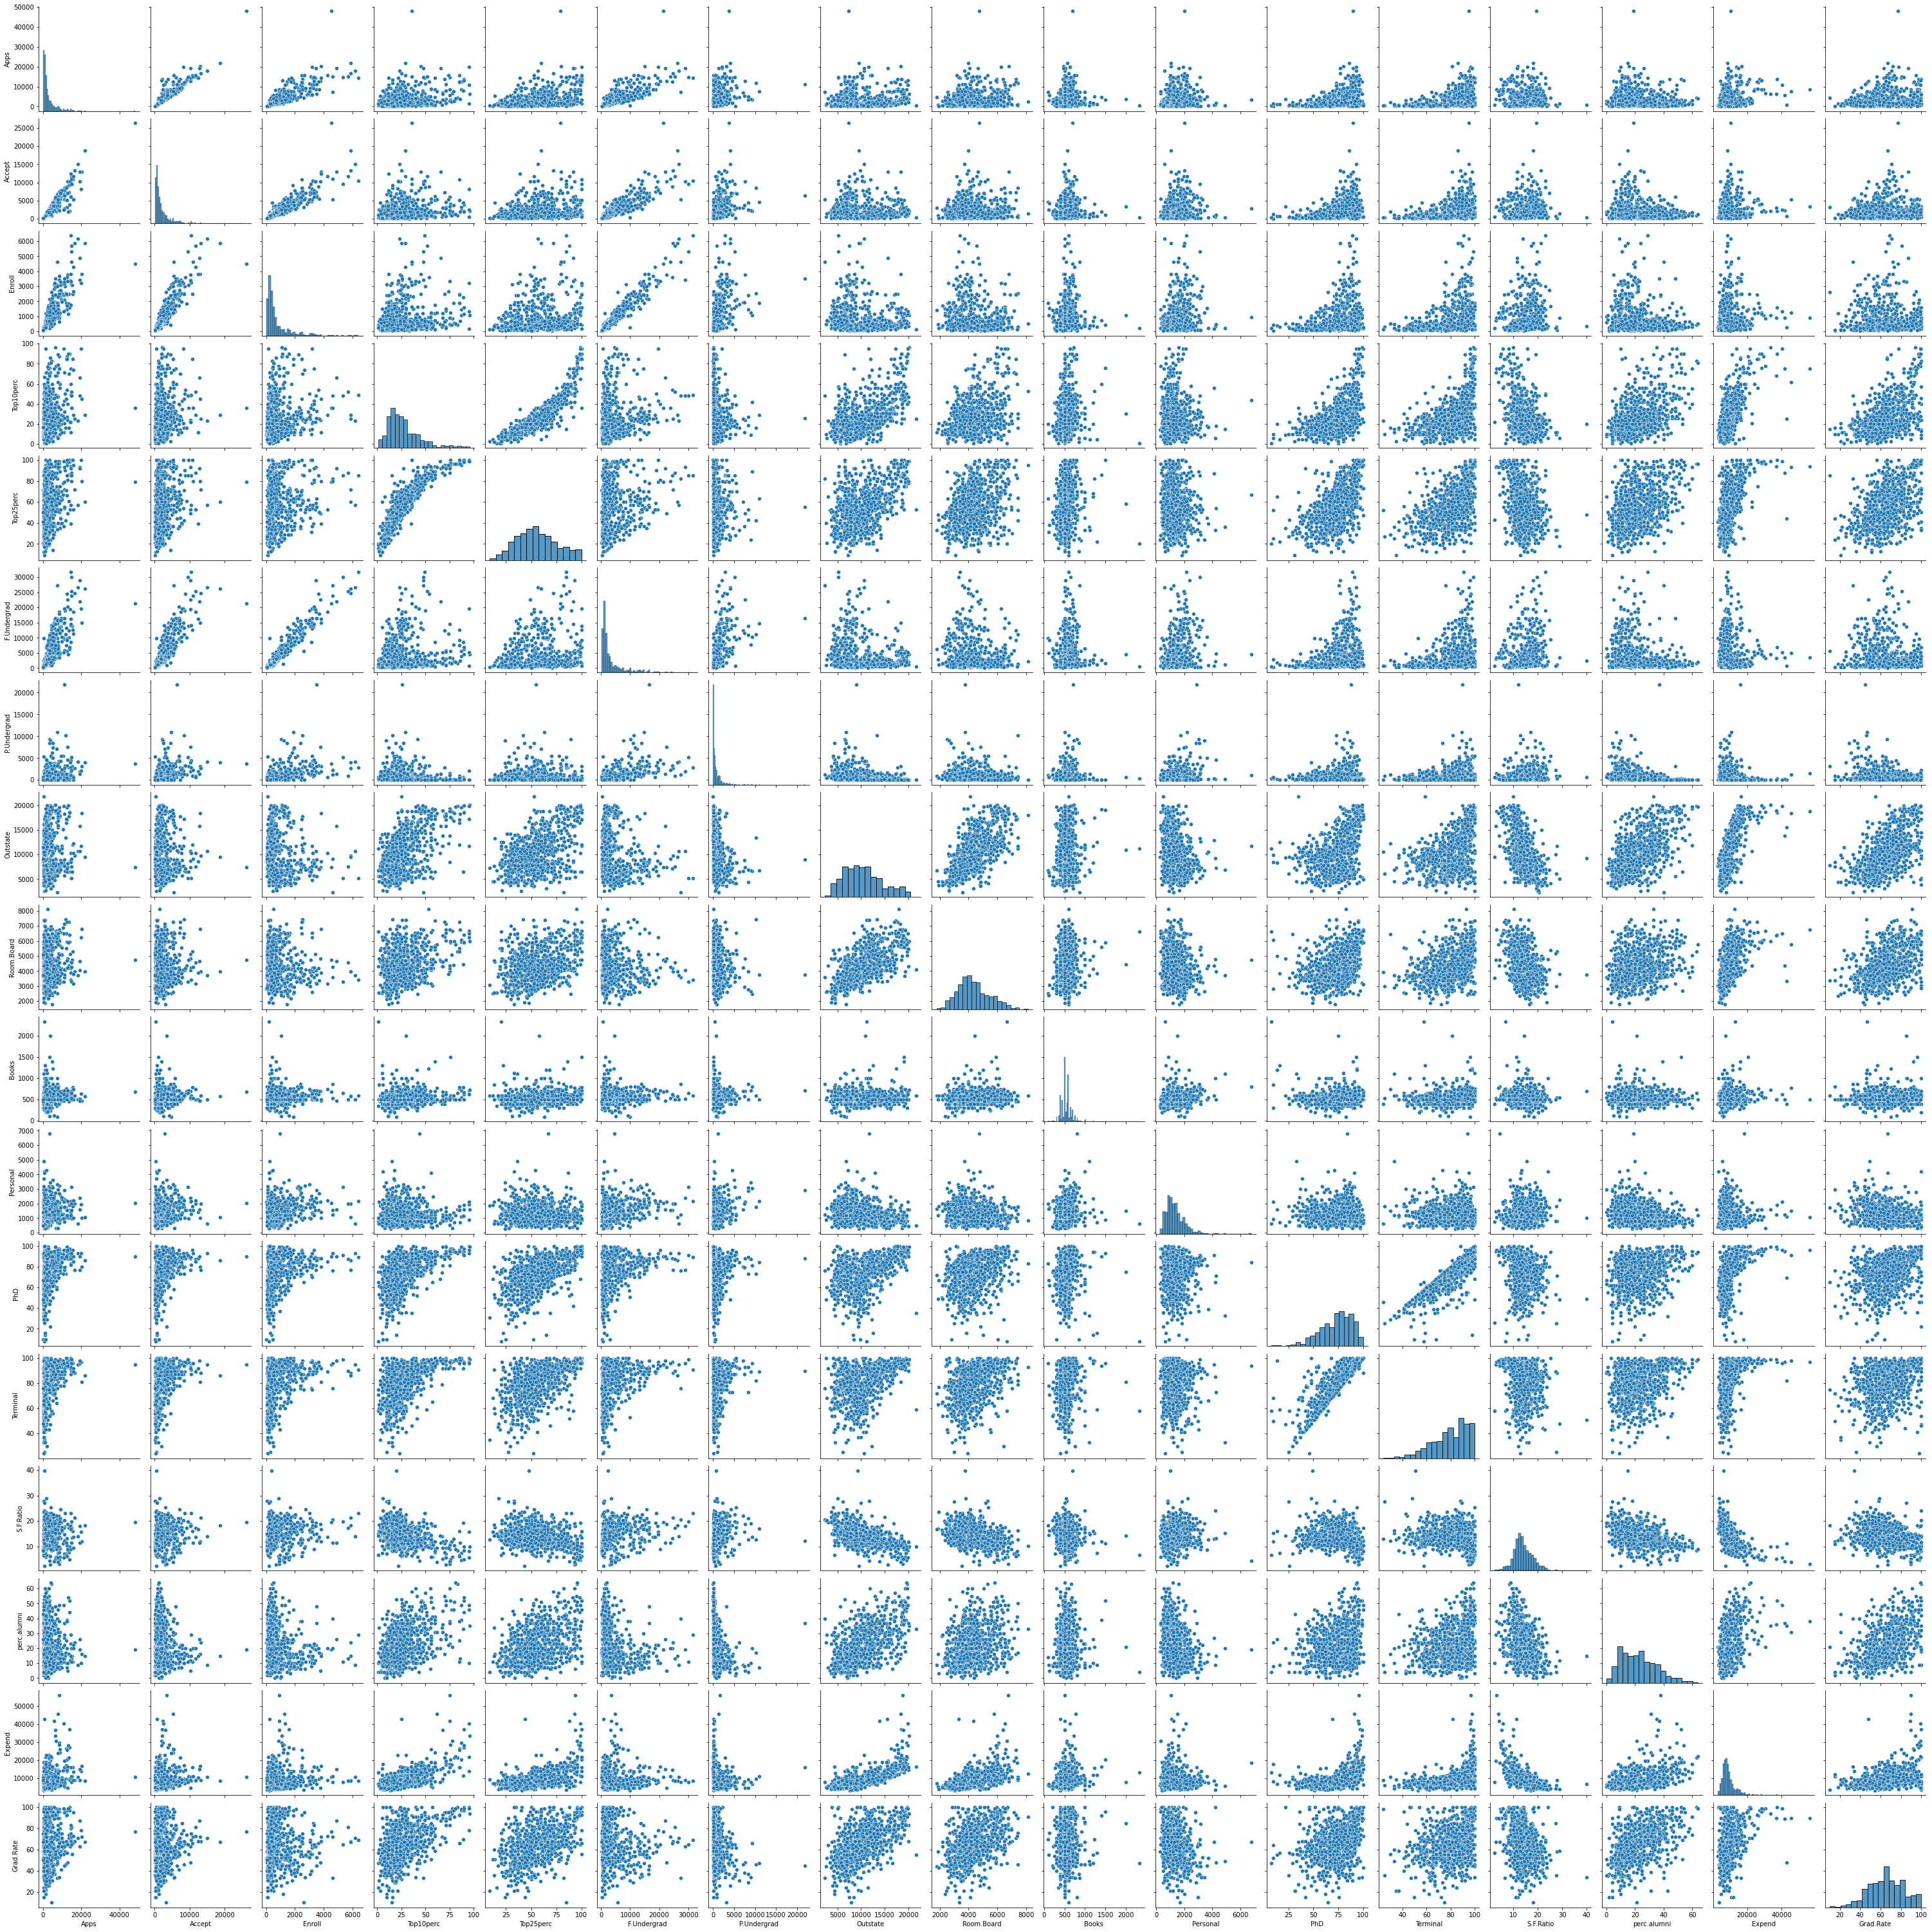

In [33]:
sns.pairplot(data=df_12th)

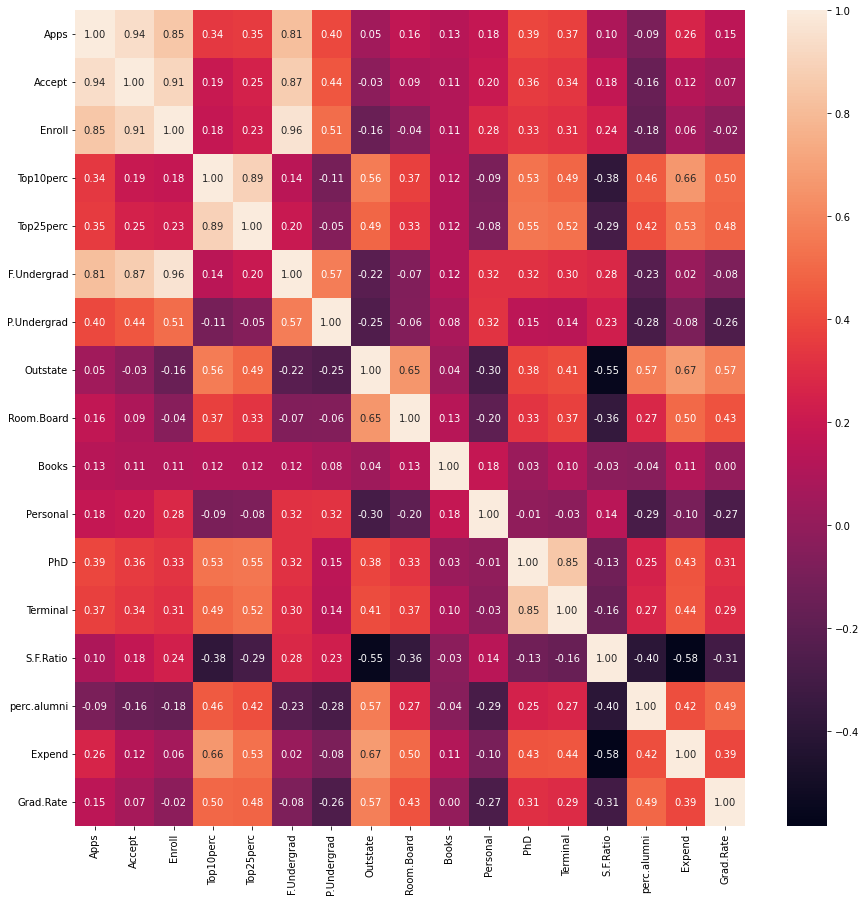

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(df_12th.corr(),annot=True,fmt=".2f");

From pairplot and heapmao, we can observe that there is strong correlation between below mentioned features:
1) Accept, Enroll, F.Undergrad vs Apps \
2) Apps, Enroll, F.Undergrad vs Accept\
3) Accept, Apps, F.Undergrad vs Enroll\
4) Top10perc vs Top25perc\
5) PhD vs Terminal

Multivariate analysis is not possible for the given dataset as we have only one categorical variable

In [35]:
df_12th = df_12th.drop(['Names'], axis=1)
df_12th.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

# 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.


Scaling is necessary for PCA in this case because all of the numerical features are not on same weight. So we need to transform the features onto same scale. \
For example, 
1) features like Top10perc, Top25perc, Grad.Rate are in percentage scale  \
2) features like Apps, Accept are on number scale ranging from 2 digits to 5 digits

In [36]:
#Scale the data
from scipy.stats import zscore
df_12th_scaled = df_12th.apply(zscore)
df_12th_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.162859 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.676529 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.205112 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185939  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204995 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.317993  
1  -0.477704    -0.544572  0.166110  -0.551805  
2  -0.300749     0.585935 -0.177290  -0.668710  
3  -1.615274     1.151188  1.792851  -0.376446  
4  -0.553542    -1.675079  0.241803  -2.948375

# 2.3 Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].


In [63]:
round(df_12th_scaled.corr(),2)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.00    0.94    0.85       0.34       0.35         0.81   
Accept       0.94    1.00    0.91       0.19       0.25         0.87   
Enroll       0.85    0.91    1.00       0.18       0.23         0.96   
Top10perc    0.34    0.19    0.18       1.00       0.89         0.14   
Top25perc    0.35    0.25    0.23       0.89       1.00         0.20   
F.Undergrad  0.81    0.87    0.96       0.14       0.20         1.00   
P.Undergrad  0.40    0.44    0.51      -0.11      -0.05         0.57   
Outstate     0.05   -0.03   -0.16       0.56       0.49        -0.22   
Room.Board   0.16    0.09   -0.04       0.37       0.33        -0.07   
Books        0.13    0.11    0.11       0.12       0.12         0.12   
Personal     0.18    0.20    0.28      -0.09      -0.08         0.32   
PhD          0.39    0.36    0.33       0.53       0.55         0.32   
Terminal     0.37    0.34    0.31       0.49       0.52         0.30   
S.F.Ratio    0.10    0.18    0.24      -0.38      -0.29         0.28   
perc.alumni -0.09   -0.16   -0.18       0.46       0.42        -0.23   
Expend       0.26    0.12    0.06       0.66       0.53         0.02   
Grad.Rate    0.15    0.07   -0.02       0.50       0.48        -0.08   

             P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  \
Apps                0.40      0.05        0.16   0.13      0.18  0.39   
Accept              0.44     -0.03        0.09   0.11      0.20  0.36   
Enroll              0.51     -0.16       -0.04   0.11      0.28  0.33   
Top10perc          -0.11      0.56        0.37   0.12     -0.09  0.53   
Top25perc          -0.05      0.49        0.33   0.12     -0.08  0.55   
F.Undergrad         0.57     -0.22       -0.07   0.12      0.32  0.32   
P.Undergrad         1.00     -0.25       -0.06   0.08      0.32  0.15   
Outstate           -0.25      1.00        0.65   0.04     -0.30  0.38   
Room.Board         -0.06      0.65        1.00   0.13     -0.20  0.33   
Books               0.08      0.04        0.13   1.00      0.18  0.03   
Personal            0.32     -0.30       -0.20   0.18      1.00 -0.01   
PhD                 0.15      0.38        0.33   0.03     -0.01  1.00   
Terminal            0.14      0.41        0.37   0.10     -0.03  0.85   
S.F.Ratio           0.23     -0.55       -0.36  -0.03      0.14 -0.13   
perc.alumni        -0.28      0.57        0.27  -0.04     -0.29  0.25   
Expend             -0.08      0.67        0.50   0.11     -0.10  0.43   
Grad.Rate          -0.26      0.57        0.43   0.00     -0.27  0.31   

             Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Apps             0.37       0.10        -0.09    0.26       0.15  
Accept           0.34       0.18        -0.16    0.12       0.07  
Enroll           0.31       0.24        -0.18    0.06      -0.02  
Top10perc        0.49      -0.38         0.46    0.66       0.50  
Top25perc        0.52      -0.29         0.42    0.53       0.48  
F.Undergrad      0.30       0.28        -0.23    0.02      -0.08  
P.Undergrad      0.14       0.23        -0.28   -0.08      -0.26  
Outstate         0.41      -0.55         0.57    0.67       0.57  
Room.Board       0.37      -0.36         0.27    0.50       0.43  
Books            0.10      -0.03        -0.04    0.11       0.00  
Personal        -0.03       0.14        -0.29   -0.10      -0.27  
PhD              0.85      -0.13         0.25    0.43       0.31  
Terminal         1.00      -0.16         0.27    0.44       0.29  
S.F.Ratio       -0.16       1.00        -0.40   -0.58      -0.31  
perc.alumni      0.27      -0.40         1.00    0.42       0.49  
Expend           0.44      -0.58         0.42    1.00       0.39  
Grad.Rate        0.29      -0.31         0.49    0.39       1.00

In [64]:
round(df_12th_scaled.cov(),2)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.00    0.94    0.85       0.34       0.35         0.82   
Accept       0.94    1.00    0.91       0.19       0.25         0.88   
Enroll       0.85    0.91    1.00       0.18       0.23         0.97   
Top10perc    0.34    0.19    0.18       1.00       0.89         0.14   
Top25perc    0.35    0.25    0.23       0.89       1.00         0.20   
F.Undergrad  0.82    0.88    0.97       0.14       0.20         1.00   
P.Undergrad  0.40    0.44    0.51      -0.11      -0.05         0.57   
Outstate     0.05   -0.03   -0.16       0.56       0.49        -0.22   
Room.Board   0.17    0.09   -0.04       0.37       0.33        -0.07   
Books        0.13    0.11    0.11       0.12       0.12         0.12   
Personal     0.18    0.20    0.28      -0.09      -0.08         0.32   
PhD          0.39    0.36    0.33       0.53       0.55         0.32   
Terminal     0.37    0.34    0.31       0.49       0.53         0.30   
S.F.Ratio    0.10    0.18    0.24      -0.39      -0.30         0.28   
perc.alumni -0.09   -0.16   -0.18       0.46       0.42        -0.23   
Expend       0.26    0.12    0.06       0.66       0.53         0.02   
Grad.Rate    0.15    0.07   -0.02       0.50       0.48        -0.08   

             P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  \
Apps                0.40      0.05        0.17   0.13      0.18  0.39   
Accept              0.44     -0.03        0.09   0.11      0.20  0.36   
Enroll              0.51     -0.16       -0.04   0.11      0.28  0.33   
Top10perc          -0.11      0.56        0.37   0.12     -0.09  0.53   
Top25perc          -0.05      0.49        0.33   0.12     -0.08  0.55   
F.Undergrad         0.57     -0.22       -0.07   0.12      0.32  0.32   
P.Undergrad         1.00     -0.25       -0.06   0.08      0.32  0.15   
Outstate           -0.25      1.00        0.66   0.04     -0.30  0.38   
Room.Board         -0.06      0.66        1.00   0.13     -0.20  0.33   
Books               0.08      0.04        0.13   1.00      0.18  0.03   
Personal            0.32     -0.30       -0.20   0.18      1.00 -0.01   
PhD                 0.15      0.38        0.33   0.03     -0.01  1.00   
Terminal            0.14      0.41        0.38   0.10     -0.03  0.85   
S.F.Ratio           0.23     -0.56       -0.36  -0.03      0.14 -0.13   
perc.alumni        -0.28      0.57        0.27  -0.04     -0.29  0.25   
Expend             -0.08      0.67        0.50   0.11     -0.10  0.43   
Grad.Rate          -0.26      0.57        0.43   0.00     -0.27  0.31   

             Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Apps             0.37       0.10        -0.09    0.26       0.15  
Accept           0.34       0.18        -0.16    0.12       0.07  
Enroll           0.31       0.24        -0.18    0.06      -0.02  
Top10perc        0.49      -0.39         0.46    0.66       0.50  
Top25perc        0.53      -0.30         0.42    0.53       0.48  
F.Undergrad      0.30       0.28        -0.23    0.02      -0.08  
P.Undergrad      0.14       0.23        -0.28   -0.08      -0.26  
Outstate         0.41      -0.56         0.57    0.67       0.57  
Room.Board       0.38      -0.36         0.27    0.50       0.43  
Books            0.10      -0.03        -0.04    0.11       0.00  
Personal        -0.03       0.14        -0.29   -0.10      -0.27  
PhD              0.85      -0.13         0.25    0.43       0.31  
Terminal         1.00      -0.16         0.27    0.44       0.29  
S.F.Ratio       -0.16       1.00        -0.40   -0.58      -0.31  
perc.alumni      0.27      -0.40         1.00    0.42       0.49  
Expend           0.44      -0.58         0.42    1.00       0.39  
Grad.Rate        0.29      -0.31         0.49    0.39       1.00

After scaling (z-score) the data given, both covariance and correlation matrices are same. \
From above results, we can see correlation and correlation matrices are same.

# 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]


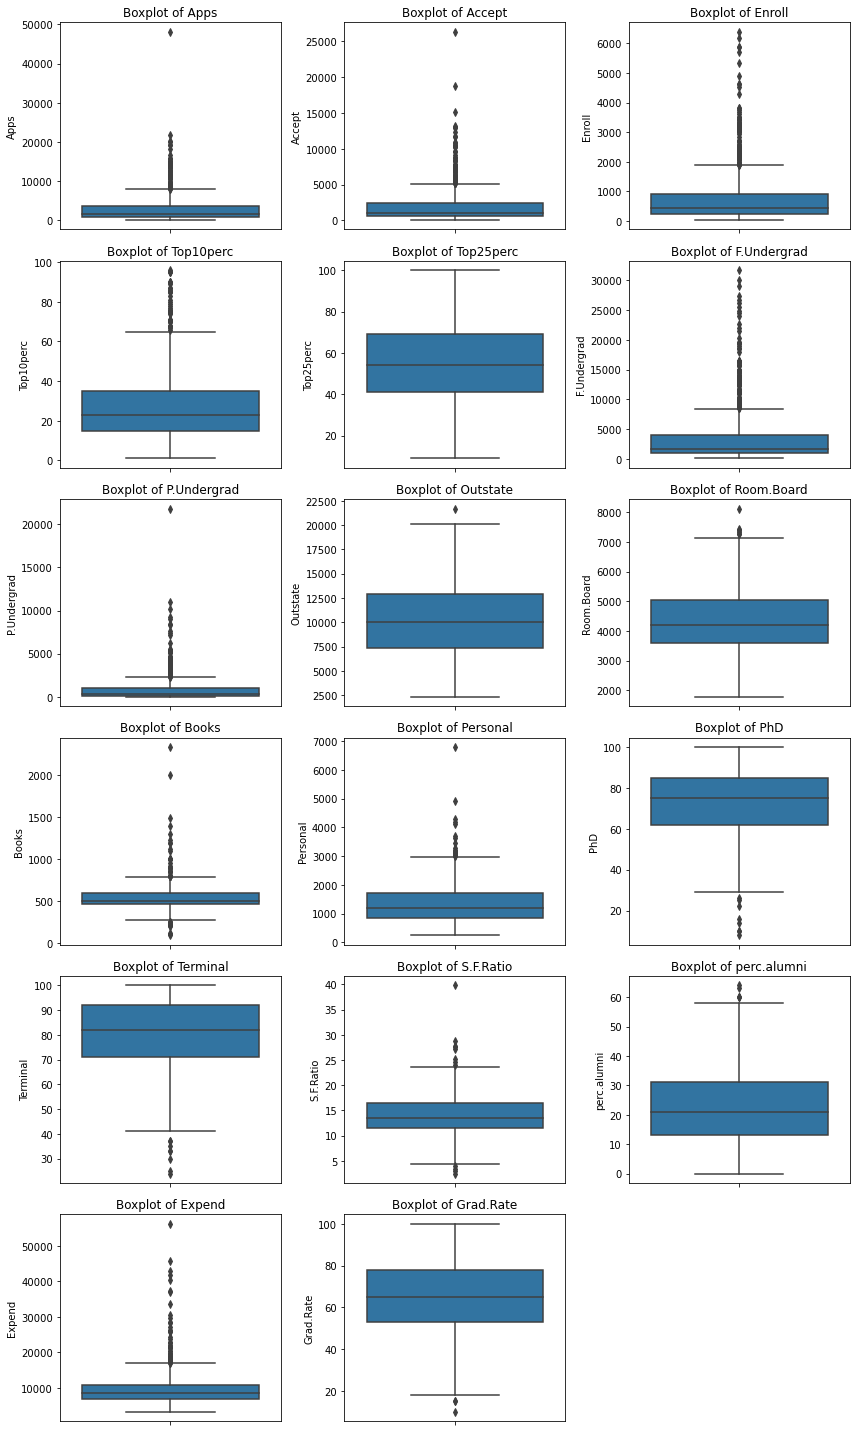

In [47]:
#Checking for outliers
plt.figure(figsize = (12,20))
feature_list = df_12th.columns
for i in range(len(feature_list)):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(y = df_12th[feature_list[i]], data = df_12th)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

After seeing above representation, we can say there are outliers in every feature except 'Top25perc' feature \
Grad.Rate, perc.alumni, Room.Board, Outstate are having very minimum no. of outliers 

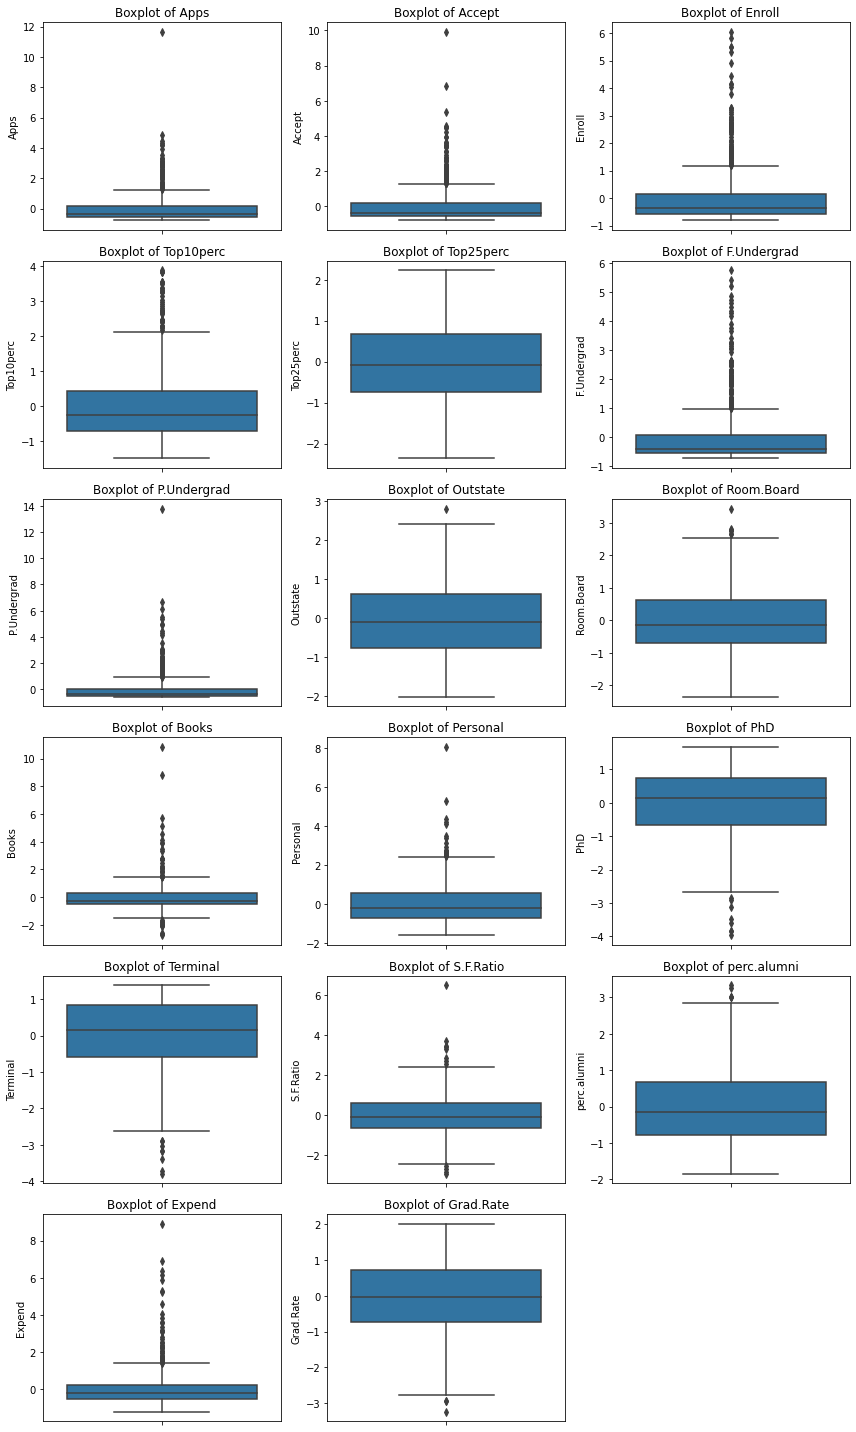

In [48]:
#Check to verify if outliers have been treated
plt.figure(figsize = (12,20))
feature_list = df_12th_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(y = df_12th_scaled[feature_list[i]], data = df_12th_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

There are same kind of outliers observed for scaled data as observed for unscaled data

# 2.5 Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]


In [49]:
#Applying PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=17,random_state=123)
pca_transformed=pca.fit_transform(df_12th_scaled)

In [76]:
#printing eigen vectors
print(pca.components_)

[[ 2.48183494e-01  2.06969666e-01  1.75694894e-01  3.54244165e-01
   3.43942665e-01  1.54038269e-01  2.60218245e-02  2.94935587e-01
   2.49048365e-01  6.45834383e-02 -4.27212841e-02  3.18442536e-01
   3.16946970e-01 -1.77143862e-01  2.05340243e-01  3.18874326e-01
   2.53800631e-01]
 [ 3.32025554e-01  3.72491384e-01  4.04001896e-01 -8.18674207e-02
  -4.42586593e-02  4.17901438e-01  3.15112160e-01 -2.49149211e-01
  -1.37349991e-01  5.64823263e-02  2.19795159e-01  5.86942062e-02
   4.68443038e-02  2.46336958e-01 -2.46268610e-01 -1.31140311e-01
  -1.69072352e-01]
 [-6.16148087e-02 -9.97638535e-02 -8.22289219e-02  3.47636016e-02
  -2.46996496e-02 -6.09712128e-02  1.39028188e-01  4.73522670e-02
   1.50278691e-01  6.78096050e-01  4.98147475e-01 -1.29562447e-01
  -6.83497434e-02 -2.90605689e-01 -1.46940854e-01  2.27294587e-01
  -2.06564710e-01]
 [ 2.82568646e-01  2.69149266e-01  1.62610883e-01 -5.24694979e-02
  -1.11389363e-01  1.00948100e-01 -1.58472919e-01  1.33121744e-01
   1.86480406e-01  

In [75]:
#printing eigen values
print(pca.explained_variance_)

[5.45485033 4.48406663 1.17470127 1.00536006 0.9343371  0.84817556
 0.60551358 0.58787041 0.53053165 0.40349818 0.31326156 0.22048561
 0.16780564 0.14368317 0.08802439 0.03672101 0.02302105]


# 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features


PCA has been performed before extracting eigen vectors and eigen values. Now let's export te data of OC's to a data frame with original features.

In [56]:
df_extracted_loadings = pd.DataFrame(pca.components_.T, columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13', 'PC14', 'PC15', 'PC16', 'PC17'], index = df_12th_scaled.columns)
round(df_extracted_loadings,2)

PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11  \
Apps         0.25  0.33 -0.06  0.28  0.00 -0.01 -0.04 -0.10 -0.09  0.05  0.04   
Accept       0.21  0.37 -0.10  0.27  0.05  0.01 -0.01 -0.06 -0.18  0.04 -0.06   
Enroll       0.18  0.40 -0.08  0.16 -0.06 -0.04 -0.03  0.06 -0.13  0.03 -0.07   
Top10perc    0.35 -0.08  0.03 -0.05 -0.39 -0.05 -0.16 -0.12  0.34  0.06 -0.01   
Top25perc    0.34 -0.04 -0.02 -0.11 -0.43  0.03 -0.12 -0.10  0.40  0.01 -0.27   
F.Undergrad  0.15  0.42 -0.06  0.10 -0.04 -0.04 -0.02  0.08 -0.06  0.02 -0.08   
P.Undergrad  0.03  0.32  0.14 -0.16  0.30 -0.19  0.05  0.57  0.56 -0.22  0.10   
Outstate     0.29 -0.25  0.05  0.13  0.22 -0.03  0.11  0.01 -0.00  0.18  0.14   
Room.Board   0.25 -0.14  0.15  0.19  0.56  0.16  0.21 -0.22  0.28  0.30 -0.36   
Books        0.06  0.06  0.68  0.08 -0.13  0.64 -0.15  0.21 -0.13 -0.08  0.03   
Personal    -0.04  0.22  0.50 -0.24 -0.22 -0.33  0.63 -0.23 -0.09  0.14 -0.02   
PhD          0.32  0.06 -0.13 -0.53  0.14  0.09 -0.00 -0.08 -0.19 -0.12  0.04   
Terminal     0.32  0.05 -0.07 -0.52  0.21  0.15 -0.03 -0.01 -0.26 -0.08 -0.06   
S.F.Ratio   -0.18  0.25 -0.29 -0.16 -0.08  0.49  0.22 -0.08  0.28  0.47  0.44   
perc.alumni  0.21 -0.25 -0.15  0.02 -0.22 -0.05  0.24  0.68 -0.25  0.42 -0.13   
Expend       0.32 -0.13  0.23  0.08  0.08 -0.30 -0.23 -0.06 -0.05  0.14  0.69   
Grad.Rate    0.25 -0.17 -0.21  0.26 -0.11  0.22  0.56 -0.00  0.04 -0.59  0.22   

             PC12  PC13  PC14  PC15  PC16  PC17  
Apps         0.02  0.60  0.08  0.13  0.46  0.36  
Accept      -0.15  0.29  0.03 -0.15 -0.52 -0.54  
Enroll       0.01 -0.45 -0.08  0.03 -0.40  0.61  
Top10perc    0.04  0.00 -0.11  0.70 -0.15 -0.14  
Top25perc   -0.09  0.02  0.15 -0.62  0.05  0.08  
F.Undergrad  0.06 -0.52 -0.05  0.01  0.56 -0.41  
P.Undergrad -0.06  0.13  0.02  0.02 -0.05  0.01  
Outstate    -0.82 -0.14 -0.03  0.04  0.10  0.05  
Room.Board   0.35 -0.07 -0.06  0.00 -0.03  0.00  
Books       -0.03  0.01 -0.07 -0.01  0.00  0.00  
Personal    -0.04  0.04  0.03 -0.00 -0.01 -0.00  
PhD          0.02  0.12 -0.69 -0.11  0.03  0.01  
Terminal     0.02 -0.05  0.67  0.16 -0.03  0.01  
S.F.Ratio   -0.01 -0.02  0.04 -0.02 -0.02 -0.00  
perc.alumni  0.18  0.10 -0.03 -0.01  0.00 -0.02  
Expend       0.33 -0.09  0.07 -0.23 -0.04 -0.04  
Grad.Rate    0.12 -0.07  0.04 -0.00 -0.01 -0.01

# 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]


PC1= 0.25*Apps + 0.21*Accept + 0.18*Enroll + 0.35*Top10perc + 0.34*Top25perc + 0.15*F.Undergrad + 0.03*P.Undergrad + 0.29*Outstate + 0.25*Room.Board + 0.06*Books - 0.04*Personal + 0.32*PhD + 0.32*Terminal - 0.18*S.F.Ratio + 0.21*perc.alumni + 0.32*Expend + 0.25*Grad.Rate 

# 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?


In [77]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.32046058 0.58388974 0.65290088 0.7119636  0.76685387 0.81668234
 0.85225494 0.88679105 0.91795863 0.94166327 0.9600667  0.97301975
 0.98287797 0.99131904 0.99649028 0.99864756 1.        ]


Cumulative values of the eigenvalues shows the percentage of data covered after each PC. It also helps us to reduce the dimensions by deciding how many PC's have to be taken. Generally, it reduces the dimensions by half after selecting first 5 PC's which cover 70-80% of the data. \
For the given case, selecting 5, 6 PC's will cover the 76%, 81% of the data respectively.

# 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]


Interpretations: 
For this case study, we can take first 6 PCs which covers ~81% of the data.

In [81]:
df_selected=df_extracted_loadings[['PC1', 'PC2','PC3','PC4','PC5','PC6']]
df_selected

PC1       PC2       PC3       PC4       PC5       PC6
Apps         0.248183  0.332026 -0.061615  0.282569  0.004158 -0.014238
Accept       0.206970  0.372491 -0.099764  0.269149  0.054318  0.009380
Enroll       0.175695  0.404002 -0.082229  0.162611 -0.056603 -0.041347
Top10perc    0.354244 -0.081867  0.034764 -0.052469 -0.394960 -0.053064
Top25perc    0.343943 -0.044259 -0.024700 -0.111389 -0.425700  0.032288
F.Undergrad  0.154038  0.417901 -0.060971  0.100948 -0.044035 -0.042658
P.Undergrad  0.026022  0.315112  0.139028 -0.158473  0.303348 -0.192744
Outstate     0.294936 -0.249149  0.047352  0.133122  0.221797 -0.028860
Room.Board   0.249048 -0.137350  0.150279  0.186480  0.559744  0.164168
Books        0.064583  0.056482  0.678096  0.079488 -0.128343  0.641364
Personal    -0.042721  0.219795  0.498147 -0.236126 -0.221267 -0.333976
PhD          0.318443  0.058694 -0.129562 -0.533695  0.143265  0.087686
Terminal     0.316947  0.046844 -0.068350 -0.519385  0.207796  0.151537
S.F.Ratio   -0.177144  0.246337 -0.290606 -0.163696 -0.078557  0.486124
perc.alumni  0.205340 -0.246269 -0.146941  0.017638 -0.216206 -0.047228
Expend       0.318874 -0.131140  0.227295  0.081376  0.075677 -0.297658
Grad.Rate    0.253801 -0.169072 -0.206565  0.260607 -0.111222  0.216104

Generally each PC influences (or variates) the given factors in different levels.
Now, let's check how the selected PCs influence the factors given.
1) PC1 influences most of the factors positively except 'P.Undergrad', 'Books', 'Personal', 'S.F.Ratio' \
2) PC2 influences Apps, Accept, Enroll, F.Undergrad, P.Undergrad, Personal, S.F.Ratio \
3) PC3 influences P.Undergrad, Room.Board, S.F.Ratio, Books, Personal,Expend \
4) PC4 influences Apps, Accept, Enroll, F.Undergrad, Room.Board, Grad.Rate \
5) PC5 influences P.Graduate, Outstae, Room.Board, PhD, Terminal \
6) PC6 influences Room.Board, Books, Terminal, S.F.Ratio





By above influencial analysis of factors by PCs, we can study the different factors w.r.t to the data which is dimensionally reduced to 6 PCs. This will ease the colleges to study and understand about the admissions, expenditure, faculty, graduation rate etc.